# Baseball Case Study
## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
'''Importing Important libraries that we will use in the project'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset into the notebook
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head(8)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


As mentioned in the problem statement, *we have both dependent and independent variables*. So, **this is a Supervised Problem**. We have to predict the number of wins for a given team based on various factors. Hence, the prediction is made in continous variable. **This is a kind of Regression Problem**.We have now got the dataset and we can start the EDA process on this data.
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Exploratory Data Analysis:
we first of all identify the dependent and independent variables.

In [3]:
# dataset dimension.
ds = data.copy()
print(f"Shape of the dataset is: {ds.shape}")

Shape of the dataset is: (30, 17)


***In the dataset, we have 30 indexes and 17 features*** including the target variable wins.**'Wins' is the dependent variable** for this case study. There are **total 16 independent variables present in the data**.

Change the names of the mentioned features so that we can analyse them better.

In [4]:
cols = ['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 
        'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'CG', 'Shutouts', 'Saves', 'Errors']
ds.columns = cols
ds.head(8)

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


We now seperate the target from the other features. We will perform various analysis on the dependent variables and also them combined along with the label.

In [5]:
x = ds.loc[:,'Runs':'Errors']
y = ds.loc[:,'Wins']
print(f"Shape of the features is {x.shape} and of target is {y.shape}")

Shape of the features is (30, 16) and of target is (30,)


![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)
We first check the info of the features. This will help us look at the datatypes of different columns and check for the presence of null values.

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  CG                  30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

From the above information we can draw some insights about the data:

    1. There are no null values which are present in the dataset.
    2. The datatype of all the features and the target is int64, except 'Earned Run Average' which is of float64 datatype.
## Handling Null Values:
We also visualise the null values in the data using a heatmap.

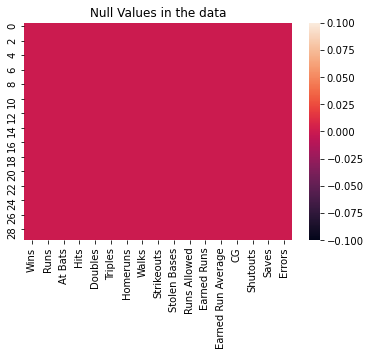

In [7]:
sns.heatmap(ds.isnull())
plt.title("Null Values in the data")
plt.show()

From the above heatmap, it is clear that no null values are present in the dataset. So, **handling of null values is not required.**
![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)
## Descriptive statistics:
Now we will look at some statistical information about the dataset.

In [8]:
x.describe()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1. The standard deviation for the data is quite high, maximum for feature 'Strikeouts' and minimum for 'Earned Run Average'. This means that data can be heavily spread. 
2. We will look at the distribution of the data using distplot.

![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)

## Outliers - Detection and Removal
Since the difference between the quantiles and minimum/maximum values is nominal, outliers may not be present in the dataset. But, we will still check the presence of outliers using the z-score values and visualise it using boxplots.

In [9]:
#print(plt.style.available) to view available styles
# plt.style.use('default') to go back to default.

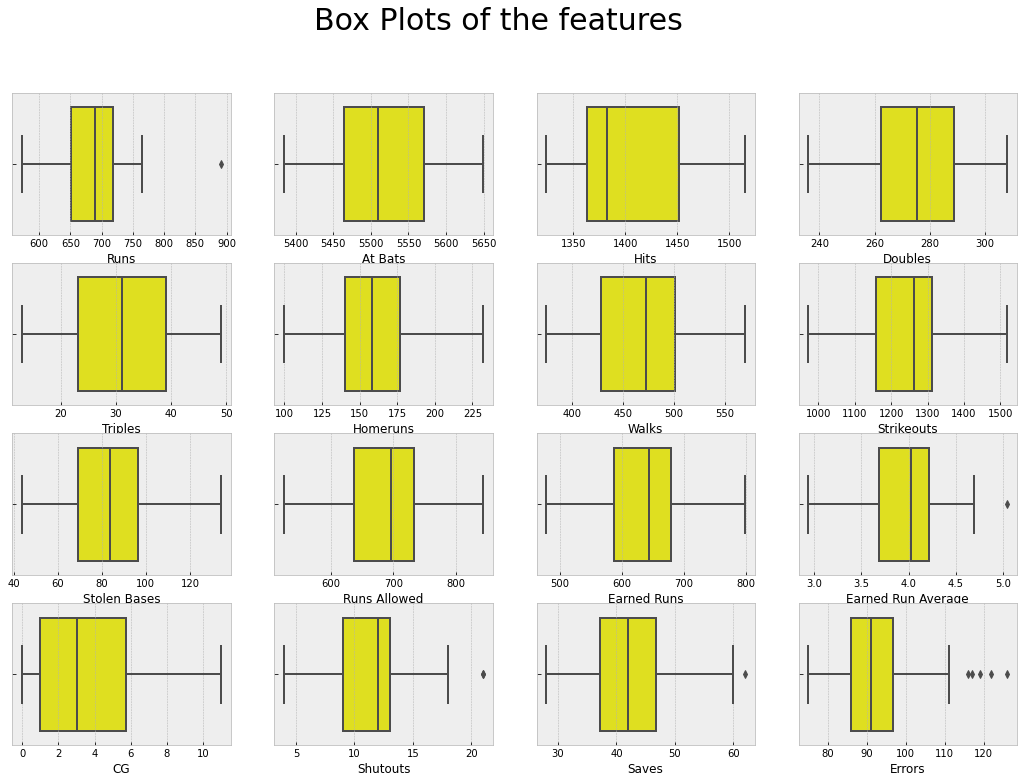

In [10]:
plt.figure(figsize = (18, 12))
x_cols = x.columns.values
plt.suptitle("Box Plots of the features", fontsize = 30)
plt.style.use('bmh') # to change the style of boxplots
for i in range(0, len(x_cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x[x_cols[i]], color = 'yellow')
plt.show()

We see that ***some outliers are present in*** the columns *'Runs', 'Earned Run Average', 'Shutouts', 'Saves' and 'Errors'*. Checking the outliers using the zscore is important. If we have some outliers after checking through z-score, we will **replace these outliers with the mean or median** of the features accordingly **so that there is not loss of data by removing them.**

In [11]:
zabs = np.abs(zscore(x))
loc_out = np.where(zabs > 3)
print(np.shape(loc_out))

(2, 1)


We see from the above zscores that only 1 outliers is present in the dataset which is in 'Runs' feature. We will replace this  outlier with the median of that column.

In [12]:
x['Runs'][5] = x['Runs'].median()
x['Runs'][5]

689

As we see, the value of outlier have been removed with the median of that column. We make a new dataset after removal of outliers and concat the target variable.

In [13]:
ds1 = pd.concat([x, y], axis=1)
ds1.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors,Wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)
## Correlation
Now that we have removed the outilers from the dataset, we check the correlation between the features and target variable. we will use the heat map.

In [14]:
plt.style.use('default')

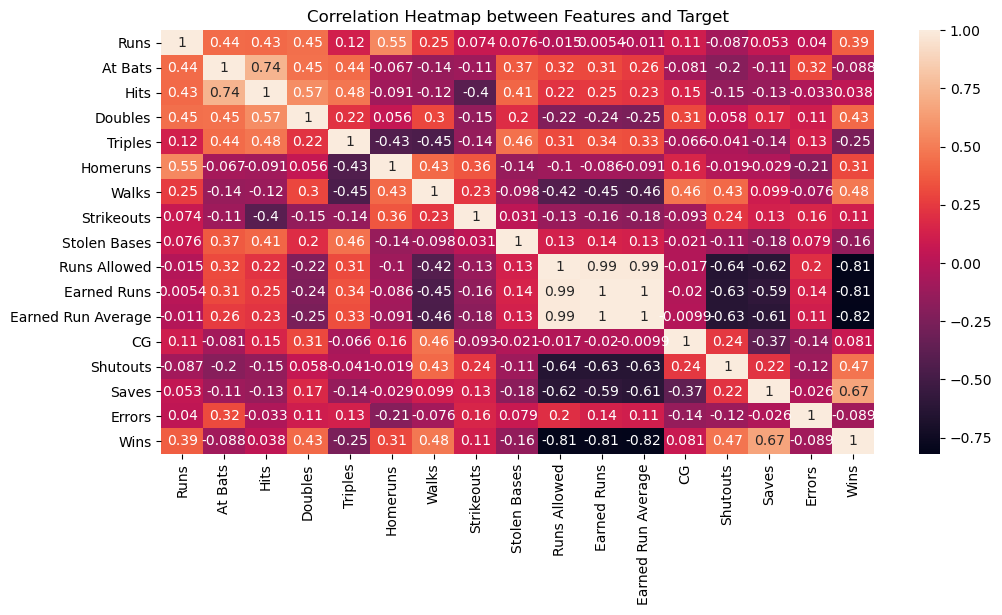

In [15]:
plt.figure(figsize = (11.5, 5.5))
sns.heatmap(ds1.corr(), annot = True)
plt.title("Correlation Heatmap between Features and Target")
plt.show()

From the correlation heatmap, we see that:
1. The correlation of 'At Bats', 'Hits', 'CG' and 'Errors' with 'Wins' is almost zero. These features can be removed to improve learning
2. The relation between 'Earned Runs' and 'Earned Run Average' is 1. That means that **we can remove one of these features**.
3. Also, relation between 'Earned Runs' and 'Runs Allowed' is also very high (0.99), **we can also one of these columns.**
4. Target variable have the high positive correlation with 'Saves', 'Walks', 'Doubles', 'Runs', 'Homeruns' and negative correlation with 'Runs Allowed', 'Earned Runs' and 'Earned Run Average'

In [16]:
ds1.drop(['At Bats', 'Hits', 'CG', 'Errors', 'Runs Allowed', 'Earned Runs'], axis = 1, inplace = True)
print(ds1.shape)
ds1.head()

(30, 11)


,Runs,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Shutouts,Saves,Wins
0,724,300,42,139,383,973,104,3.73,8,56,95
1,696,277,44,156,439,1264,70,4.07,12,45,83
2,669,303,29,141,533,1157,86,3.67,10,38,81
3,622,260,27,136,404,1231,68,3.98,9,37,76
4,689,289,49,151,455,1259,83,4.64,12,35,74


As, we see that the 'Runs Allowed' and 'Earned Runs' features are dropped from the dataset due to their high correlation with one another. Also 'At Bats', 'Hits', 'CG' and 'Errors' are dropped due to their low correlation with the target variable.


![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)

## Skewness Handling:
Now, We plot the distplot of the dataset to look at the distribution of the data. This will help us visualise if any skewness is present in the data or not.

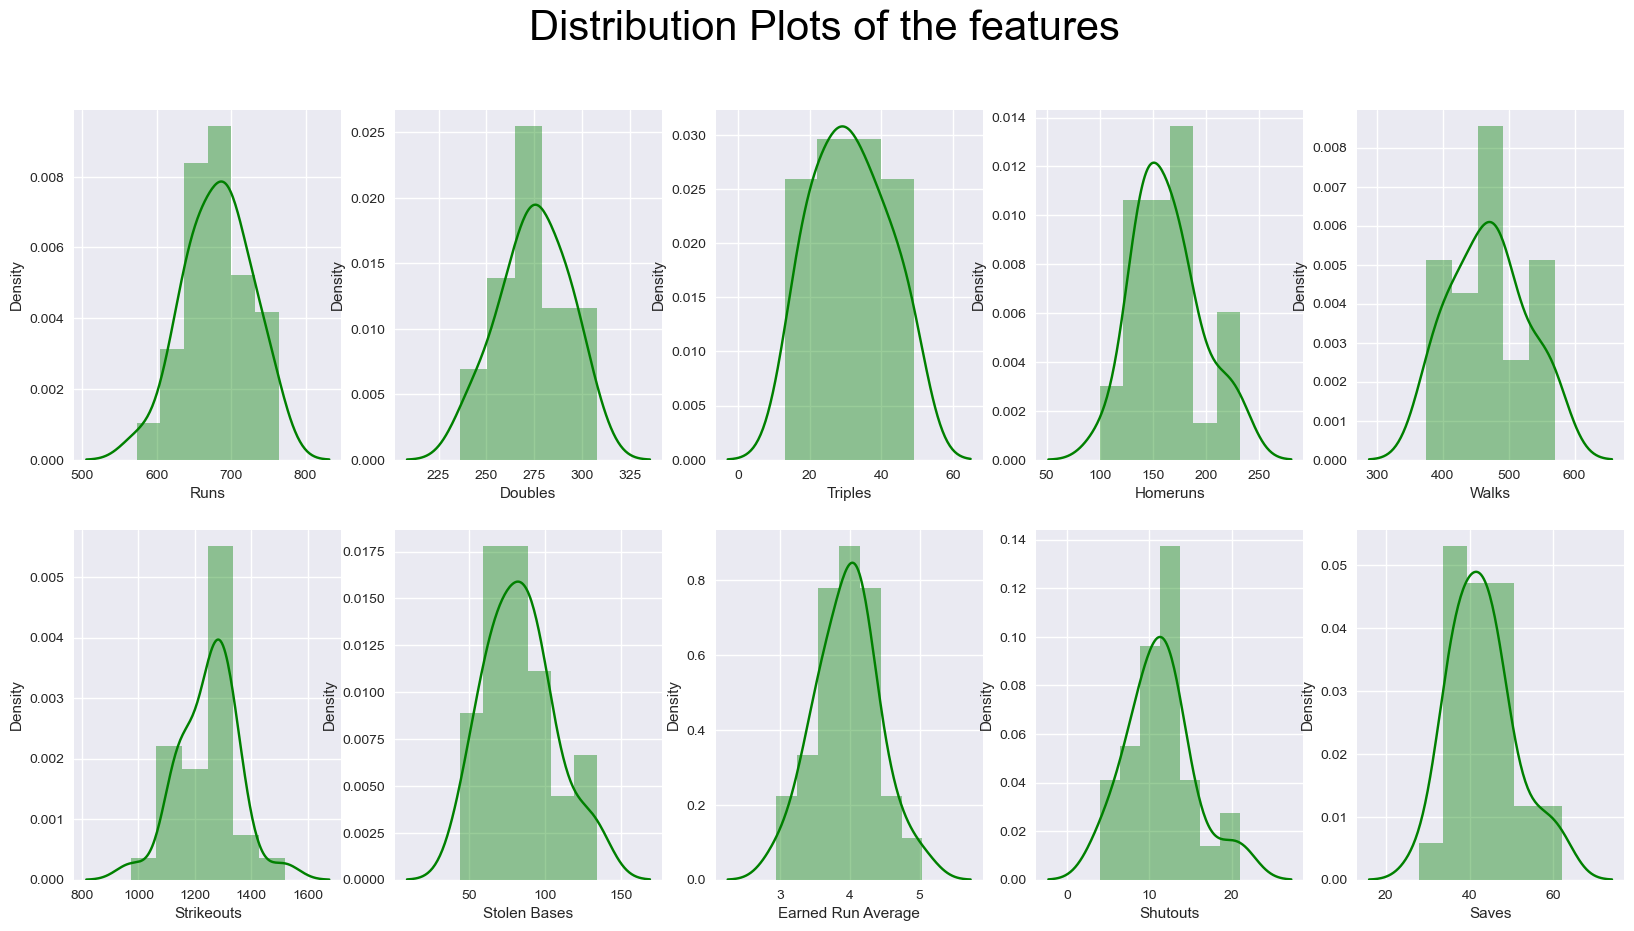

In [17]:
ds1_cols = ds1.columns.values
plt.figure(figsize = (20, 10)) # setting the figure size
plt.suptitle("Distribution Plots of the features", fontsize = 30) # Title for all the subplots
plt.style.use('seaborn') # to add the grids and use seaborn style
for i in range(0, len(ds1_cols)-1):
    plt.subplot(2, 5, i+1)
    sns.distplot(ds1[ds1_cols[i]], color = 'g')
plt.show()

We can see that the data is normally distributed for the features. Still some skewness can be present in some of the features. Checking the skewness of the data to see if it exceeds for any of the columns. we will set a threshold of 0.5 for the skewness.

In [18]:
def skew_check(lis, data): # defining a function to check the skewness for given list of columns and dataset.
    ''' 'lis' is the list of column names and 'data' is the name of dataset'''
    skew_thres_pos = 0.5 # setting positive threshold
    skew_thres_neg = -0.5 # setting negative threshold
    for i in lis:
        if (data[i].skew()) > skew_thres_pos or (data[i].skew()) < skew_thres_neg:
            a = (f"{i} : {data[i].skew()}")
        else:
            continue
        print(a)

skew_check(ds1_cols, ds1)

Homeruns : 0.5164407366297173
Shutouts : 0.5657904298216165
Saves : 0.6575235461553925


Given above are the features who have skewness more than 0.5 or less than -0.5. Removing the skewness from these features using the log transform.

In [19]:
skew_list = ['Homeruns', 'Shutouts', 'Saves']
for i in skew_list:
    ds1[i] = np.sqrt(ds1[i])

In [20]:
skew_check(ds1_cols, ds1)

The skewness of the features have been treated and now we can visualise the distplot again.

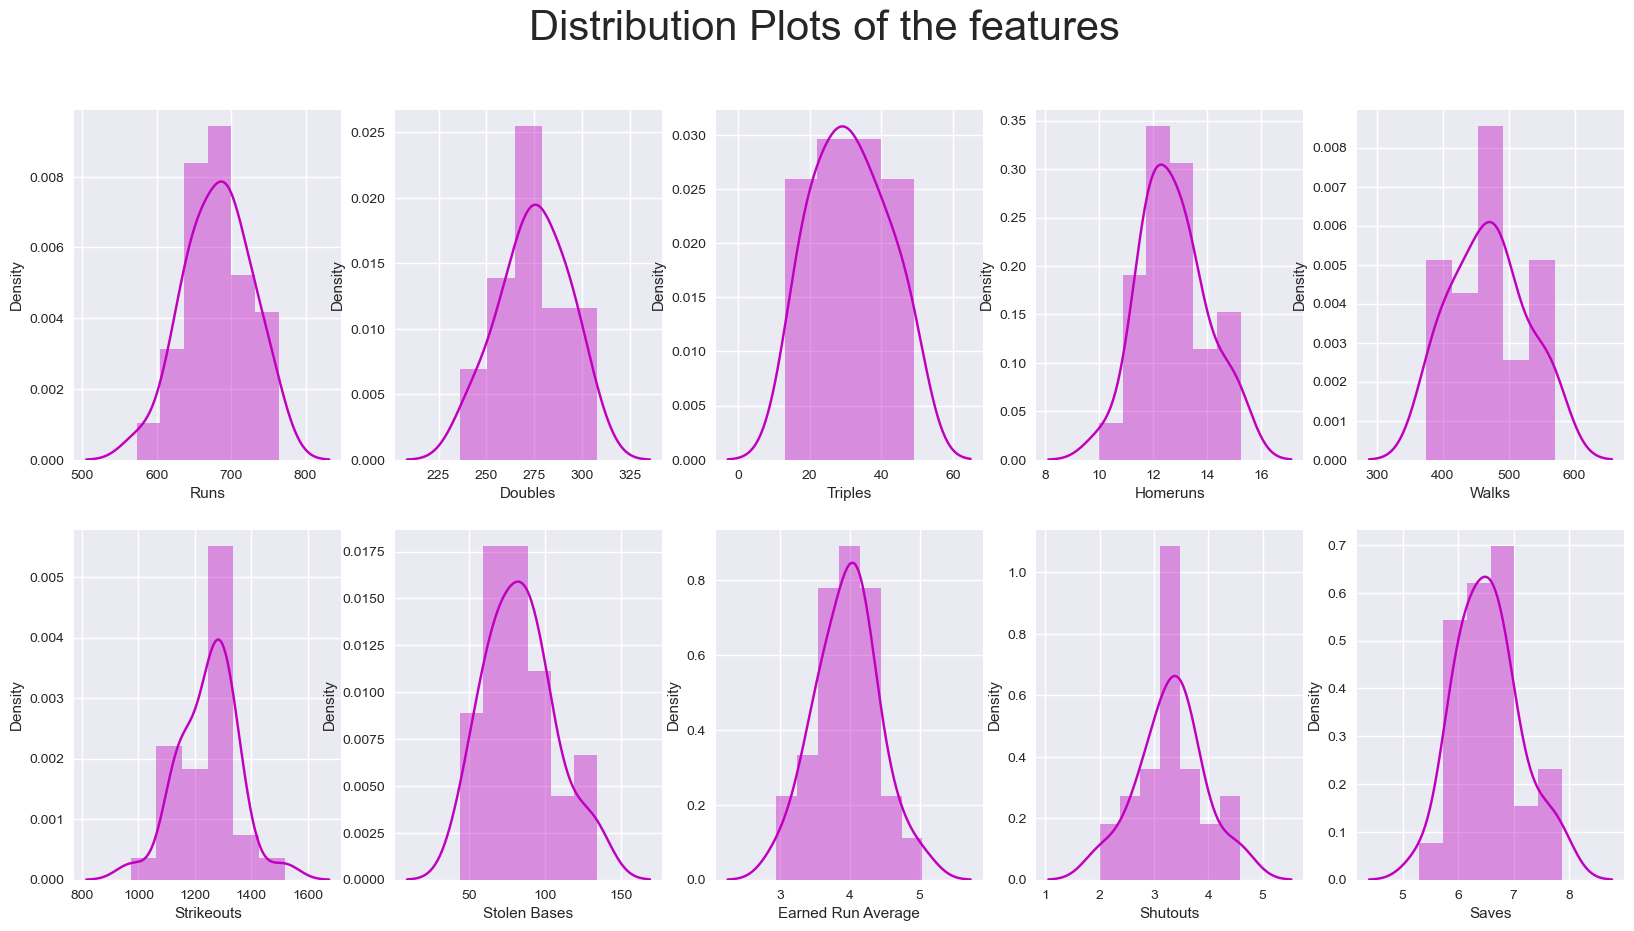

In [21]:
plt.figure(figsize = (20, 10)) # setting the figure size
plt.suptitle("Distribution Plots of the features", fontsize = 30) # Title for all the subplots
for i in range(0, len(ds1_cols)-1):
    plt.subplot(2, 5, i+1)
    sns.distplot(ds1[ds1_cols[i]], color = 'm')
plt.show()

The **data is now more normally distributed**. Standard scaler can now be used for the normally distributed data.

![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)

## Scaling:
Once we have treated the outliers and skewness, the ***data is to be scaled*** in order ***to improve the learning of models which use euclidean distance***. We will use the standard scaler for the scaling. First we seperate the target variable and scaling is only done on features.

In [22]:
ds1.head()

,Runs,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Shutouts,Saves,Wins
0,724,300,42,11.789826,383,973,104,3.73,2.828427,7.483315,95
1,696,277,44,12.489996,439,1264,70,4.07,3.464102,6.708204,83
2,669,303,29,11.874342,533,1157,86,3.67,3.162278,6.164414,81
3,622,260,27,11.661904,404,1231,68,3.98,3.000000,6.082763,76
4,689,289,49,12.288206,455,1259,83,4.64,3.464102,5.916080,74


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds1.loc[:,'Runs':'Saves'] = scaler.fit_transform(ds1.loc[:,'Runs':'Saves'])
ds1.head()

,Runs,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Shutouts,Saves,Wins
0,0.969408,1.420173,1.041193,-0.779589,-1.534902,-2.697630,0.913883,-0.506955,-0.781873,1.629882,95
1,0.330739,0.127403,1.235809,-0.201722,-0.536592,0.154878,-0.601826,0.254598,0.259567,0.295192,83
2,-0.285120,1.588795,-0.223808,-0.709836,1.139144,-0.893982,0.111449,-0.641347,-0.234918,-0.641178,81
3,-1.357171,-0.828122,-0.418423,-0.885166,-1.160536,-0.168602,-0.690985,0.053010,-0.500781,-0.781776,76
4,0.171072,0.801892,1.722347,-0.368264,-0.251360,0.105866,-0.022290,1.531318,0.259567,-1.068793,74


As we can see from before and after the scaling that dataset has now been scaled. Hence, it can be fitted in the model.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Model Building:
First of all we split the data for training and testing phase.

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ds1.loc[:,'Runs':'Saves'], ds1.loc[:,'Wins'], 
                                                    test_size = 0.2, random_state = 30)

In [25]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24, 10) (6, 10) (24,) (6,)


## Model Selection:
First we select the models that we want to use for this problem. Since ***it is a regression problem with very small dataset, we donot need to use the ensemble models or perform cross validation.*** We will use Linear Regression, . We import the models from sklearn libraries and then fit the training and testing data into the model.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print("Accuracy Score of Linear Regression model is", r2_score(y_test, pred_lr)*100)

ls = Lasso()
ls.fit(x_train, y_train)
pred_ls = ls.predict(x_test)
print("Accuracy Score of Lasso Regression model is", r2_score(y_test, pred_ls)*100)

rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
print("Accuracy Score of Ridge Regression model is", r2_score(y_test, pred_rd)*100)

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)
print("Accuracy Score of KNeighbors Regressor model is", r2_score(y_test, pred_knr)*100)

svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
print("Accuracy Score of SVR model is", r2_score(y_test, pred_svr)*100)

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
print("Accuracy Score of Decision Tree Regressor model is", r2_score(y_test, pred_dtr)*100)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
print("Accuracy Score of Gradient Boosting Regressor model is", r2_score(y_test, pred_gbr)*100)

Accuracy Score of Linear Regression model is 88.21110081419748
Accuracy Score of Lasso Regression model is 79.39764772958378
Accuracy Score of Ridge Regression model is 86.73565819655958
Accuracy Score of KNeighbors Regressor model is 44.95503211991432
Accuracy Score of SVR model is 4.083614703755201
Accuracy Score of Decision Tree Regressor model is 49.571734475374726
Accuracy Score of Gradient Boosting Regressor model is 58.18230810997471


We are getting maximum r2 score of 88.21 without any tuning from Linear Regression.

![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)

## Cross Validation:

In [28]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, x, y, scoring='r2', cv = 5) # cross validating the model
print(lr_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Linear Regression is {lr_scores.mean()*100}\n")

ls_scores = cross_val_score(ls, x, y, scoring='r2', cv = 5)
print(ls_scores)
print(f"Mean of accuracy scores is for Lasso Regression is {ls_scores.mean()*100}\n")

rd_scores = cross_val_score(rd, x, y, scoring='r2', cv = 5)
print(rd_scores)
print(f"Mean of accuracy scores is for Ridge Regression is {rd_scores.mean()*100}\n")

knr_scores = cross_val_score(knr, x, y, scoring='r2', cv = 5)
print(knr_scores)
print(f"Mean of accuracy scores is for KNeighbors Regressor is {knr_scores.mean()*100}\n")

svr_scores = cross_val_score(svr, x, y, scoring='r2', cv = 5)
print(svr_scores)
print(f"Mean of accuracy scores is for SVR is {svr_scores.mean()*100}\n")

dtr_scores = cross_val_score(dtr, x, y, scoring='r2', cv = 5)
print(dtr_scores)
print(f"Mean of accuracy scores is for Decision Tree Regressor is {dtr_scores.mean()*100}\n")

gbr_scores = cross_val_score(gbr, x, y, scoring='r2', cv = 5)
print(gbr_scores)
print(f"Mean of accuracy scores is for Gradient Boosting Regressor is {gbr_scores.mean()*100}\n")

[-1.57086158 -5.46813966  0.30665647  0.58930798 -0.70715075]
Mean of accuracy scores is for Linear Regression is -137.0037508271373

[-0.67181852 -2.45937859  0.3421354   0.54056037  0.9452258 ]
Mean of accuracy scores is for Lasso Regression is -26.065511049458877

[-1.5524187  -5.72908446  0.22228503  0.59587704  0.05694693]
Mean of accuracy scores is for Ridge Regression is -128.12788331571136

[-0.52888099 -3.62824427  0.16639756  0.08754788  0.61990533]
Mean of accuracy scores is for KNeighbors Regressor is -65.66549001025666

[-0.1603293  -0.76253712 -0.31852242 -0.75194456 -0.29877908]
Mean of accuracy scores is for SVR is -45.84224955060252

[-0.9955595  -9.58015267 -0.41431835 -0.47880691  0.37337278]
Mean of accuracy scores is for Decision Tree Regressor is -221.90929311291373

[-0.36317667 -7.52305329  0.0785713   0.15337372  0.5802752 ]
Mean of accuracy scores is for Gradient Boosting Regressor is -141.4801948241377



The *data that we have is very small, consisting of only 30 indexes, and 14 attributes including the target.* When we cross validate the models to check for the mean scores, we see that the mean scores are all negative. Dataset being very small, **we see that the cross validation does not give us the best results for this particular problem and is not useful.**

![green-divider](https://gvltoday.6amcity.com/wp-content/uploads/sites/2/2019/07/Green-Divider.png)
## Hyperparameter tuning:
Now we tune Linear model to see if the model performance is improved.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
lr = LinearRegression()

parameters = dict()
parameters['fit_intercept'] = [True, False]
parameters['normalize'] = [True, False]

gs = GridSearchCV(estimator = lr, param_grid = parameters, scoring='neg_mean_absolute_error', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-7.80859700579727
{'fit_intercept': True, 'normalize': False}


In [31]:
lr = LinearRegression(fit_intercept = True, normalize = False)
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
print("r2:", r2_score(y_test, pred_rd)*100)

r2: 86.73565819655958


From tuning, we have find out that **the best parameters are the default parameters.**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Model Evaluation:
The final model that we have selected is Ridge Regression, we will not evaluate the model to see its performance.

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print("Accuracy Score of Ridge model is", r2_score(y_test, pred_lr)*100)
print("The mean absolute error of the fitted model is", mae(y_test, pred_lr))
print("The mean squared error of the fitted model is", mse(y_test, pred_lr))
print("The root mean squared error of the fitted model is", np.sqrt(mse(y_test, pred_lr)))

Accuracy Score of Ridge model is 88.21110081419748
The mean absolute error of the fitted model is 2.6717382276534445
The mean squared error of the fitted model is 18.351386399232585
The root mean squared error of the fitted model is 4.283851818075946


In [34]:
plt.style.use('default')

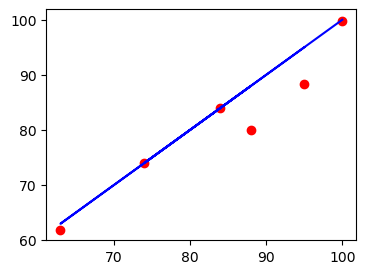

In [35]:
plt.figure(figsize = (4,3))
plt.scatter(x = y_test, y = pred_lr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.show()

# Serialisation:
Now that we have made the model, we can use it for prediction after saving it as an object.

In [36]:
import joblib
joblib.dump(svr, 'Baseball Wins Prediction Model.obj') # saving the model as an object

['Baseball Wins Prediction Model.obj']

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Conclusion:
For the given problem, we had to predict the total wins for a team. The data given for the case study is very small. The number of samples for the dataset being very small, the cross validation of the model didn't give the best results. Only one outlier was present in the data which was replaced. Correlation matrix showed that 3 features 'Runs Allowed', 'Earned Runs' and 'Earned Run Average' have very high correaltion with each other, so two of them are removed. The best possible model for this dataset was Ridge Regression. The tuning of parameters was not useful sue to size of the dataset and default parameters gave the best results. It would have been helpful if we had a larger dataset for problem solving. The comparison between actual values and predicted values is also given below.

In [37]:
pred_lr = np.round(pred_lr)
pred_lr

array([100.,  74.,  84.,  80.,  62.,  88.])

In [38]:
comp = pd.DataFrame()
comp['y_test'] = y_test
comp['pred'] = pred_lr
comp

,y_test,pred
15,100,100.0
28,74,74.0
26,84,84.0
10,88,80.0
24,63,62.0
0,95,88.0
